In [3]:
import cv2
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os 

2025-05-12 14:16:14.777255: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747048575.033283    4759 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747048575.086904    4759 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747048575.461514    4759 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747048575.461553    4759 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747048575.461556    4759 computation_placer.cc:177] computation placer alr

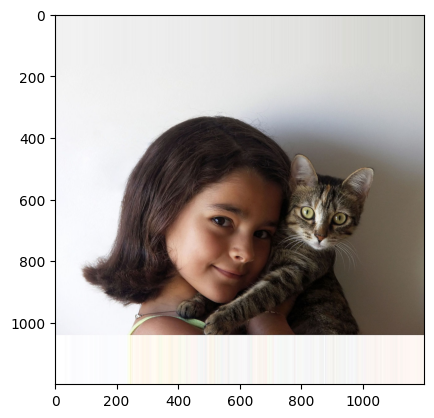

In [4]:
img = cv2.imread('images/1200px-Girl_and_cat.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = np.pad(img, ((158,158),(0,0),(0,0)),mode='edge')
plt.imshow(img)

In [5]:
vgg = keras.applications.vgg16.VGG16(weights='imagenet')

2025-05-12 14:16:21.683153: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [6]:
def predict(img):
  im = cv2.resize(img,(224,224))
  im = keras.applications.vgg16.preprocess_input(im)
  pr = vgg.predict(np.expand_dims(im,axis=0))[0]
  return np.sum(pr[281:294])

predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 882ms/step


np.float32(0.6182501)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 690ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

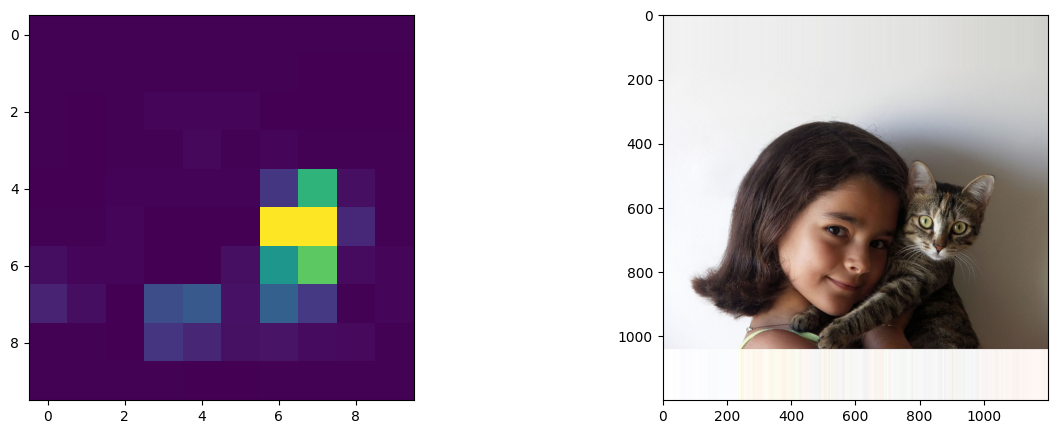

In [7]:
def predict_map(img,n):
    dx = img.shape[0] // n
    res = np.zeros((n,n),dtype=np.float32)
    for i in range(n):
        for j in range(n):
            im = img[dx*i:dx*(i+1),dx*j:dx*(j+1)]
            r = predict(im)
            res[i,j] = r
    return res

fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[1].imshow(img)
ax[0].imshow(predict_map(img,10))

In [8]:
def generate_images(num_imgs, img_size=8, min_object_size=1, max_object_size=4):
    bboxes = np.zeros((num_imgs, 4))
    imgs = np.zeros((num_imgs, img_size, img_size))

    for i_img in range(num_imgs):
        w, h = np.random.randint(min_object_size, max_object_size, size=2)
        x = np.random.randint(0, img_size - w)
        y = np.random.randint(0, img_size - h)
        imgs[i_img, x:x+w, y:y+h] = 1
        bboxes[i_img] = [x, y, w, h]
    return imgs, bboxes

imgs,bboxes = generate_images(100000)
print(f"Images shape ={imgs.shape}")
print(f"BBoxes shape = {bboxes.shape}")

Images shape =(100000, 8, 8)
BBoxes shape = (100000, 4)


In [9]:
bb = bboxes/8.0
bb[0]

array([0.125, 0.   , 0.375, 0.375])

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(8,8)),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(4)
])
model.compile('sgd','mse')
model.summary()

/home/lindanjau/.local/share/virtualenvs/ai-x-CTmFw2/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │        13,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           804 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,804 (53.92 KB)

 Trainable params: 13,804 (53.92 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
imgs_norm = (imgs-np.mean(imgs))/np.std(imgs)
model.fit(imgs_norm,bb,epochs=30)

Epoch 1/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.1103
Epoch 2/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0159
Epoch 3/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0084
Epoch 4/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0062
Epoch 5/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0051
Epoch 6/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0046
Epoch 7/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0042
Epoch 8/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0039
Epoch 9/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0037
Epoch 10/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0035
Epoch 11/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0034
Epoch 12/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0033
Epoch 13/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0031
Epoch 14/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0030
Epoch 15/30
3125/3125 ━━━━

In [12]:
def IOU(bbox1, bbox2):
    x1, y1, w1, h1 = bbox1[0], bbox1[1], bbox1[2], bbox1[3]
    x2, y2, w2, h2 = bbox2[0], bbox2[1], bbox2[2], bbox2[3]
    w_I = min(x1 + w1, x2 + w2) - max(x1, x2)
    h_I = min(y1 + h1, y2 + h2) - max(y1, y2)
    if w_I <= 0 or h_I <= 0:
        return 0
    I = w_I * h_I
    U = w1 * h1 + w2 * h2 -I
    return I / U

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
pred=[3.7253373 2.2932587 1.1288422 1.303437 ],act=[4. 2. 1. 1.], IOU=0.32322472815073056
pred=[0.14766908 4.929039   2.653975   1.0705591 ],act=[0. 5. 3. 1.], IOU=0.8320684840796827
pred=[-0.09056532 -0.04164302  1.8119869   2.9155083 ],act=[0. 0. 2. 3.], IOU=0.7808309636035046
pred=[3.882056  3.0347824 1.0601652 2.7586365],act=[4. 3. 1. 3.], IOU=0.7816422868658897
pred=[2.9985743 1.013904  1.2943773 2.6444802],act=[3. 1. 1. 3.], IOU=0.6998802945948066


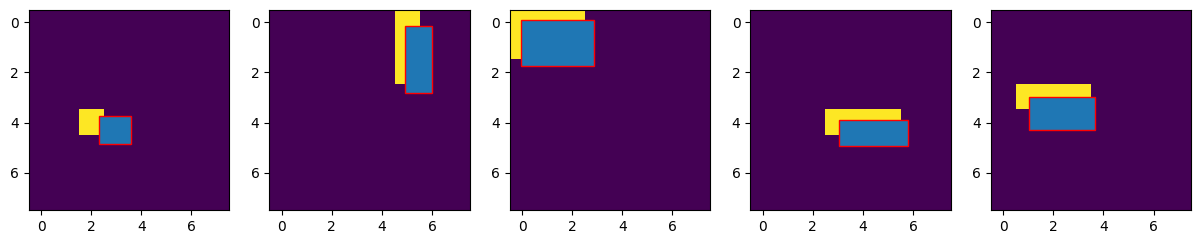

In [15]:
import matplotlib

test_imgs, test_bboxes = generate_images(500)
bb_res = model.predict((test_imgs-np.mean(imgs))/np.std(imgs))*8

plt.figure(figsize=(15,5))
for i in range(5):
    print(f"pred={bb_res[i]},act={test_bboxes[i]}, IOU={IOU(bb_res[i], test_bboxes[i])}")
    plt.subplot(1,5,i+1)
    plt.imshow(test_imgs[i])
    plt.gca().add_patch(matplotlib.patches.Rectangle((bb_res[i,1],bb_res[i,0]),bb_res[i,3],bb_res[i,2],ec='r'))